In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

# Do disasters have an effect on temperature in Säve, Sweden? 

The events will we look at:
- Mount Pinatubo Eurption (1991 (June 9- June 15)) - caused cooling of global temperatures? 
- Chernobl Disaster (April 26, 1986)
- El nino la nina events?  

Data 

In [2]:
df = pd.read_pickle('../Dataframes/daily_temp_gbg_save_adjusted.pkl')

In [3]:
df

,Datum,Kvalitet,Snittemperatur,Month,Year,Day_of_year,Over_10_5_days_in_a_row
0,1944-01-01,G,3.20,1,1944,1,0
1,1944-01-02,G,3.60,1,1944,2,0
2,1944-01-03,G,2.80,1,1944,3,0
3,1944-01-04,G,-4.47,1,1944,4,0
4,1944-01-05,G,-1.40,1,1944,5,0
...,...,...,...,...,...,...,...
29109,2023-10-12,G,12.78,10,2023,285,0
29110,2023-10-13,G,12.59,10,2023,286,0
29111,2023-10-14,G,12.24,10,2023,287,1
29112,2023-10-15,G,10.79,10,2023,288,0


## Mount Pinatubo Eruption ( June 9- June 15th, 1991)

### On the dates, June 9- June 15th, 1991 Mount Pinatubo Eruption  in the Phillippines erupted. It hypothesized by (X) that global temperatures saw a cooling. 

### Were these effects visible in Säve. Were they visible immediately after? Was there a global cooling for the following two years? 




##### Null Hypothesis: The temperatures in Säve, Sweden a week after the Mount Pinatubo Eruption were not statistically different than X. (or possibly, the variance for that week was not greater than Z)

##### Alternative Hypothesis: The temperatures in Säve, Sweden a week after the Mount Pinatubo Eruption were statistically different than X. (or possibly, the variance for that week was greater than Z)

Data preprocessing 

In [4]:
# Data form ? Do we want weeks, months? or just days? 


In [5]:
# check for missing values
yearly_day_counts = df.groupby('Year')['Day_of_year'].nunique()

years_with_less_than_365 = yearly_day_counts[yearly_day_counts < 365]

print( years_with_less_than_365.index)

Index([2013, 2023], dtype='int32', name='Year')


In [6]:
# impute average temps for missing 2013 data 
count_2013 = yearly_day_counts.get(2013, "Year not found")
count_2013

335

In [7]:
# Filter the DataFrame for the year 2013
data_2013 = df[df['Year'] == 2013]



In [8]:
monthly_day_counts_2013 = data_2013.groupby(['Year', 'Month'])['Day_of_year'].nunique()

# Find and print the months with fewer than 30 unique days
months_under_30 = monthly_day_counts_2013[monthly_day_counts_2013 < 30]
months_under_30

Year  Month
2013  2        28
      12        1
Name: Day_of_year, dtype: int64

In [9]:
# Filter the DataFrame for the year 2013 and the specific date range
data_2013 = df[(df['Year'] == 2013) & (df['Datum'] >= '2013-12-02') & (df['Datum'] <= '2013-12-31')]

# Calculate the mean temperature for the entire dataset
imputed_data = pd.DataFrame(columns=['Datum', 'Snittemperatur'])

data_before_2013 = df[df['Year'] < 2013]

# Loop through the missing dates in December 2013
for date in pd.date_range(start='2013-12-02', end='2013-12-31'):
    # Calculate the mean temperature for the respective day in history
    mean_temperature = data_before_2013[data_before_2013['Datum'].dt.strftime('%m-%d') == date.strftime('%m-%d')]['Snittemperatur'].mean()
    imputed_data = pd.concat([imputed_data, pd.DataFrame({'Datum': [date], 'Snittemperatur': [mean_temperature]})], ignore_index=True)





In [10]:
df = df.set_index('Datum')
imputed_data = imputed_data.set_index('Datum')

imputed_data 
df


,Kvalitet,Snittemperatur,Month,Year,Day_of_year,Over_10_5_days_in_a_row
Datum,,,,,,
1944-01-01,G,3.20,1,1944,1,0
1944-01-02,G,3.60,1,1944,2,0
1944-01-03,G,2.80,1,1944,3,0
1944-01-04,G,-4.47,1,1944,4,0
1944-01-05,G,-1.40,1,1944,5,0
...,...,...,...,...,...,...
2023-10-12,G,12.78,10,2023,285,0
2023-10-13,G,12.59,10,2023,286,0
2023-10-14,G,12.24,10,2023,287,1


In [11]:
df = pd.concat([df, imputed_data], axis=0)
df = df.sort_values(by='Datum', ascending=True)


In [12]:
df.drop(columns=['Kvalitet', 'Over_10_5_days_in_a_row'])

,Snittemperatur,Month,Year,Day_of_year
Datum,,,,
1944-01-01,3.20,1.0,1944.0,1.0
1944-01-02,3.60,1.0,1944.0,2.0
1944-01-03,2.80,1.0,1944.0,3.0
1944-01-04,-4.47,1.0,1944.0,4.0
1944-01-05,-1.40,1.0,1944.0,5.0
...,...,...,...,...
2023-10-12,12.78,10.0,2023.0,285.0
2023-10-13,12.59,10.0,2023.0,286.0
2023-10-14,12.24,10.0,2023.0,287.0


Summary Statistics:

- in order to perform a t-test on the data. the data must meet some assumptions: 
  - Normal Distributed

In [13]:
# Summary statistics


Text(0, 0.5, 'Frequency')

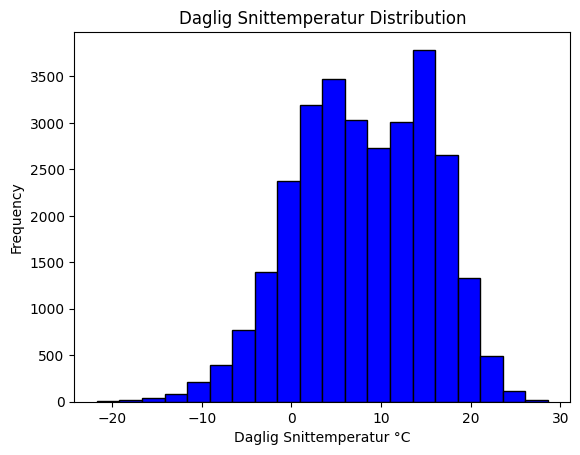

In [14]:
## is the data normally distributed? 
plt.hist(df['Snittemperatur'], bins = 20,color='blue', edgecolor='black' )
plt.title('Daglig Snittemperatur Distribution')
plt.xlabel('Daglig Snittemperatur °C')
plt.ylabel('Frequency')



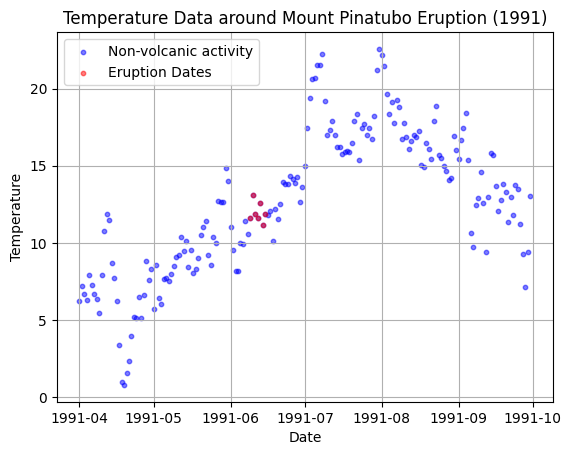

In [16]:
## chart 
filtered_data = df['1991-04-01':'1991-09-30']


plt.scatter(filtered_data.index, filtered_data['Snittemperatur'], s=10, color='blue', alpha=0.5, label= 'Non-volcanic activity')

# plt.axvline(x='1991-06-09', color='red', linestyle='--', label='Eruption Date (1991-06-09)')
eruption_data = df['1991-06-09':'1991-06-15']

plt.scatter(eruption_data.index, eruption_data['Snittemperatur'], s=10, color='red', alpha=0.5, label='Eruption Dates')


plt.title('Temperature Data around Mount Pinatubo Eruption (1991)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()
plt.show()

Statistical test

In [25]:
# Calculate the baseline mean temperature (1950-1990)
baseline_period =  (df['Year'] <= 1990)
baseline_mean_temp = df.loc[baseline_period, 'Snittemperatur'].mean()

anomaly_window = (df['Year'] == 1991) & (df['Month'].between(4, 6))


# Calculate temperature anomalies by subtracting the baseline mean
df['Temperature_Anomaly'] = df['Snittemperatur'] - baseline_mean_temp


# # pre_eruption_mean_temp = df.loc[pre_eruption_period, 'Snittemperatur'].mean()
# pre_eruption_anomaly = pre_eruption_mean_temp - baseline_mean_temp

# # Calculate temperature anomalies for June-November 1991
# post_eruption_period = (df['Year'] == 1991) & (df['Month'].between(6, 8))
# post_eruption_mean_temp = df.loc[post_eruption_period, 'Snittemperatur'].mean()
# post_eruption_anomaly = post_eruption_mean_temp - baseline_mean_temp


In [26]:
df

,Kvalitet,Snittemperatur,Month,Year,Day_of_year,Over_10_5_days_in_a_row,Temperature_Anomaly
Datum,,,,,,,
1944-01-01,G,3.20,1.0,1944.0,1.0,0.0,-4.190345
1944-01-02,G,3.60,1.0,1944.0,2.0,0.0,-3.790345
1944-01-03,G,2.80,1.0,1944.0,3.0,0.0,-4.590345
1944-01-04,G,-4.47,1.0,1944.0,4.0,0.0,-11.860345
1944-01-05,G,-1.40,1.0,1944.0,5.0,0.0,-8.790345
...,...,...,...,...,...,...,...
2023-10-12,G,12.78,10.0,2023.0,285.0,0.0,5.389655
2023-10-13,G,12.59,10.0,2023.0,286.0,0.0,5.199655
2023-10-14,G,12.24,10.0,2023.0,287.0,1.0,4.849655


In [24]:
rolling_mean

Datum
1944-01-01          NaN
1944-01-02          NaN
1944-01-03     3.200000
1944-01-04     0.643333
1944-01-05    -1.023333
                ...    
2023-10-12    13.056667
2023-10-13    13.356667
2023-10-14    12.536667
2023-10-15    11.873333
2023-10-16     9.333333
Name: Snittemperatur, Length: 29144, dtype: float64

In [22]:

# Perform a t-test to determine if the anomalies are significantly different
t_stat, p_value = ttest_ind(df.loc[pre_eruption_period, 'Snittemperatur'], df.loc[post_eruption_period, 'Snittemperatur'])

# Print the results
print(f'Baseline Mean Temperature: {baseline_mean_temp}')
print(f'Anomaly (Feb-May 1991): {pre_eruption_anomaly}')
print(f'Anomaly (June-November 1991): {post_eruption_anomaly}')
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# You can then interpret the results and assess the significance of the temperature changes.


Baseline Mean Temperature: 7.39034543018582
Anomaly (Feb-May 1991): -2.852178763519153
Anomaly (June-November 1991): 8.31943717850983
T-Statistic: -18.776155796314402
P-Value: 8.075412135394709e-47


In [ ]:
# 
data_before = [...]
data_after = [...]

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(data_before, data_after)

if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
    print("The Mount Pinatubo eruption had a statistically significant effect on the weather.")
else:
    print("There is no statistically significant effect of the eruption on the weather.")